In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy

sns.set_context("paper", rc={"font.size": 20, "axes.titlesize": 20, "axes.labelsize": 10})

In [151]:
data = pd.read_csv("C:/Users/indra/Downloads/ANZ synthesised transaction dataset.csv")
data

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0.0,NaN,ACC-3021093232,AUD,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,NaN,Melissa,...,30,Ringwood,VIC,2018-10-31T23:09:06.000+0000,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,Australia,CUS-55310383,145.23 -37.81,debit
12039,authorized,1.0,NaN,ACC-1608363396,AUD,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,NaN,Robert,...,20,Casula,NSW,2018-10-31T23:21:46.000+0000,63.87,56e147e5485f4683b9076fcaaed76640,Australia,CUS-2688605418,150.88 -33.96,debit
12040,authorized,1.0,NaN,ACC-3827517394,AUD,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,NaN,Craig,...,28,Kings Park,NSW,2018-10-31T23:34:25.000+0000,43.96,2fdd4681827343f6af2e6519644a684a,Australia,CUS-2663907001,150.92 -33.74,debit
12041,authorized,1.0,NaN,ACC-2920611728,AUD,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,NaN,Tyler,...,69,Oakleigh,VIC,2018-10-31T23:47:05.000+0000,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,Australia,CUS-1388323263,145.09 -37.91,debit


In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   status             12043 non-null  object 
 1   card_present_flag  7717 non-null   float64
 2   bpay_biller_code   885 non-null    object 
 3   account            12043 non-null  object 
 4   currency           12043 non-null  object 
 5   long_lat           12043 non-null  object 
 6   txn_description    12043 non-null  object 
 7   merchant_id        7717 non-null   object 
 8   merchant_code      883 non-null    float64
 9   first_name         12043 non-null  object 
 10  balance            12043 non-null  float64
 11  date               12043 non-null  object 
 12  gender             12043 non-null  object 
 13  age                12043 non-null  int64  
 14  merchant_suburb    7717 non-null   object 
 15  merchant_state     7717 non-null   object 
 16  extraction         120

In [153]:
data.drop(['bpay_biller_code', 'merchant_code', 'merchant_id', 'currency', 'country'], axis=1, inplace=True)
data["date"] = pd.to_datetime(data["date"])
data

,status,card_present_flag,account,long_lat,txn_description,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement
0,authorized,1.0,ACC-1598451071,153.41 -27.95,POS,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,ACC-1598451071,153.41 -27.95,SALES-POS,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,ACC-1222300524,151.23 -33.94,POS,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,ACC-1037050564,153.10 -27.66,SALES-POS,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,ACC-1598451071,153.41 -27.95,SALES-POS,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,CUS-2487424745,153.44 -28.06,debit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0.0,ACC-3021093232,149.83 -29.47,POS,Melissa,14054.14,2018-10-31,F,30,Ringwood,VIC,2018-10-31T23:09:06.000+0000,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,CUS-55310383,145.23 -37.81,debit
12039,authorized,1.0,ACC-1608363396,151.22 -33.87,SALES-POS,Robert,9137.79,2018-10-31,M,20,Casula,NSW,2018-10-31T23:21:46.000+0000,63.87,56e147e5485f4683b9076fcaaed76640,CUS-2688605418,150.88 -33.96,debit
12040,authorized,1.0,ACC-3827517394,151.12 -33.89,POS,Craig,45394.57,2018-10-31,M,28,Kings Park,NSW,2018-10-31T23:34:25.000+0000,43.96,2fdd4681827343f6af2e6519644a684a,CUS-2663907001,150.92 -33.74,debit
12041,authorized,1.0,ACC-2920611728,144.96 -37.76,SALES-POS,Tyler,11350.67,2018-10-31,M,69,Oakleigh,VIC,2018-10-31T23:47:05.000+0000,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,CUS-1388323263,145.09 -37.91,debit


In [154]:
data.describe()

,card_present_flag,balance,age,amount
count,7717.000000,12043.000000,12043.000000,12043.000000
mean,0.802644,14704.195553,30.582330,187.933588
std,0.398029,31503.722652,10.046343,592.599934
min,0.000000,0.240000,18.000000,0.100000
25%,1.000000,3158.585000,22.000000,16.000000
50%,1.000000,6432.010000,28.000000,29.000000
75%,1.000000,12465.945000,38.000000,53.655000
max,1.000000,267128.520000,78.000000,8835.980000


### Average Transaction Amount: 187.93 AUD

In [155]:
data['account'].nunique()

100

### This shows that the dataset contains information on 100 different Customers

## Univariate Analysis

In [156]:
num_features = ['balance', 'amount']
cat_features = ['status', 'card_present_flag', 'txn_description', 'age', 'merchant_state', 'movement']

## Categorical Features

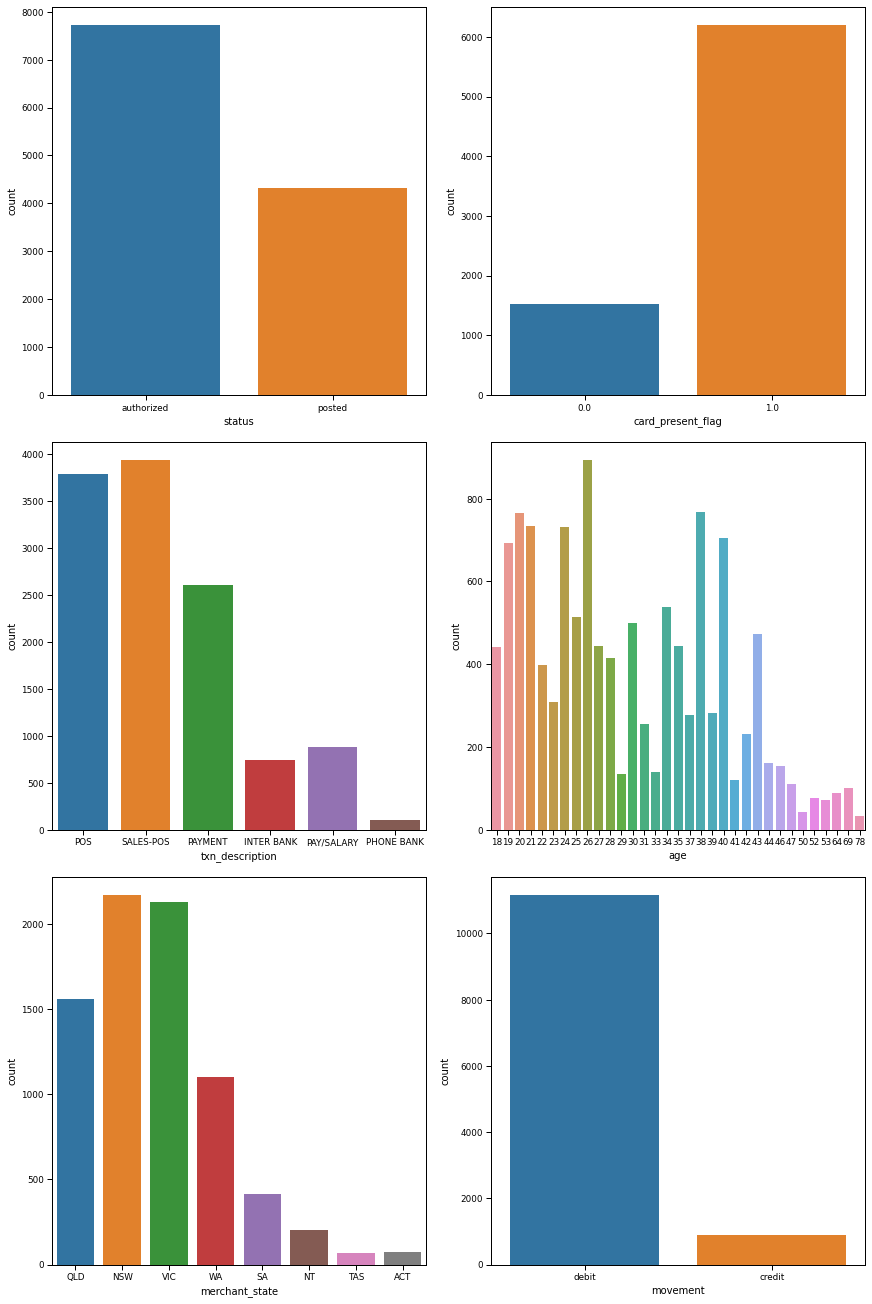

In [157]:
num_plots = len(cat_features)
total_cols = 2
total_rows = num_plots//total_cols
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(6*total_cols, 6*total_rows), facecolor='w', constrained_layout=True)
for i, var in enumerate(cat_features):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.countplot(x=var, data=data, ax=axs[row][pos])

## Numerical Features

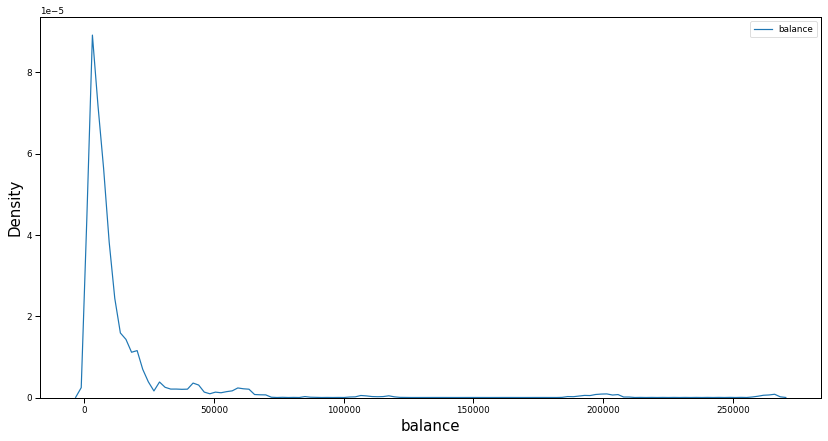

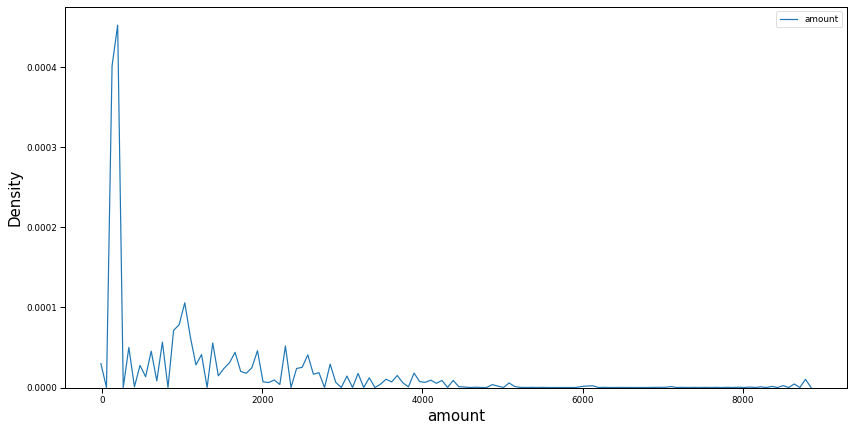

In [158]:
for var in num_features:
    plt.figure(figsize=(7 * 2, 7 * 1), facecolor='w')
    sns.kdeplot(data[var])
    plt.xlabel(var, fontsize=15)
    plt.ylabel('Density', fontsize=15)
    plt.show()

## Amount Outlier detection

Text(0.5, 1.0, 'Outlier detection of Transaction Amount')

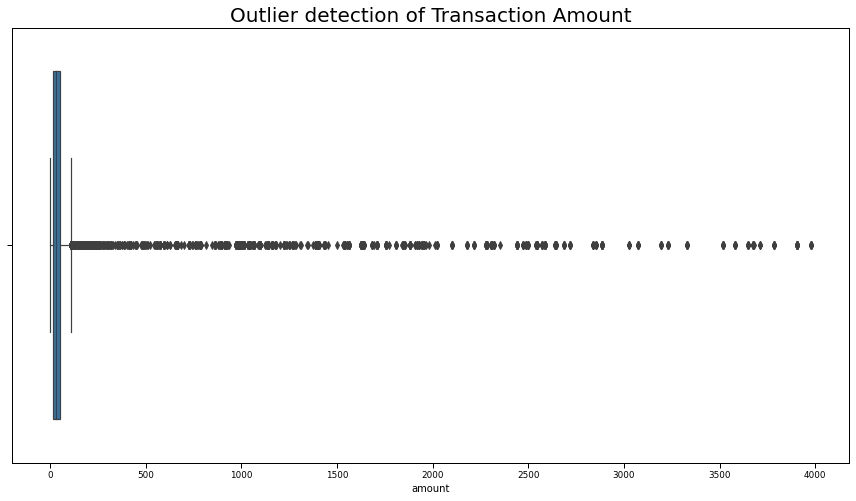

In [159]:
plt.figure(figsize=(15, 8))
sns.boxplot(data[data['amount'] < 4000]['amount'])
plt.title("Outlier detection of Transaction Amount")

## Balance Outlier detection

Text(0.5, 1.0, 'Outlier detection of Balance after Transaction')

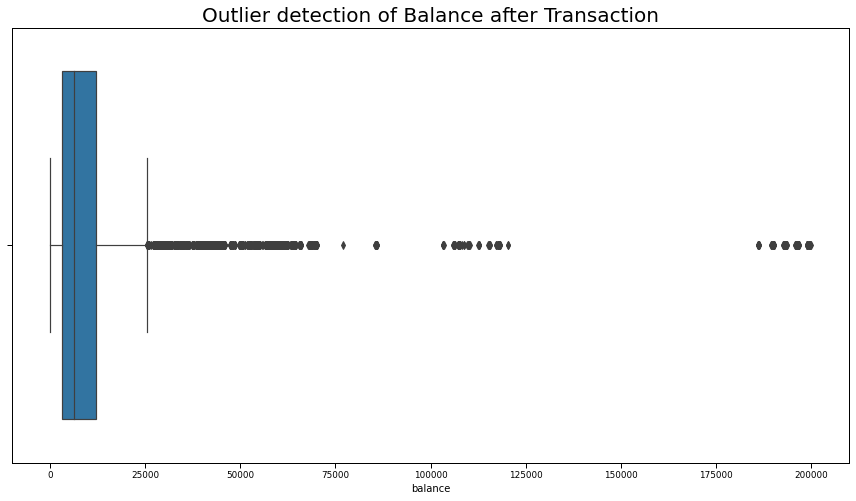

In [160]:
plt.figure(figsize=(15, 8))
sns.boxplot(data[data['balance'] < 200000]['balance'])
plt.title("Outlier detection of Balance after Transaction")

## Plotting features again by removing outliers

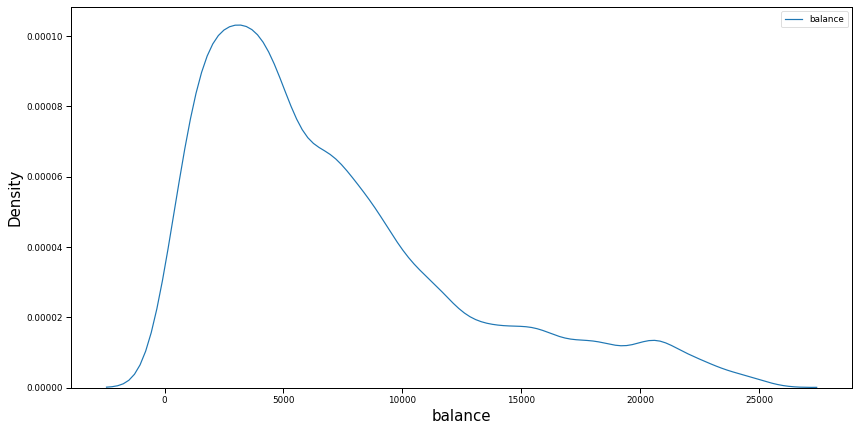

In [161]:
plt.figure(figsize=(14, 7), facecolor='w')
sns.kdeplot(data[data['balance'] < 25000]['balance'])
plt.xlabel("balance", fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.show()

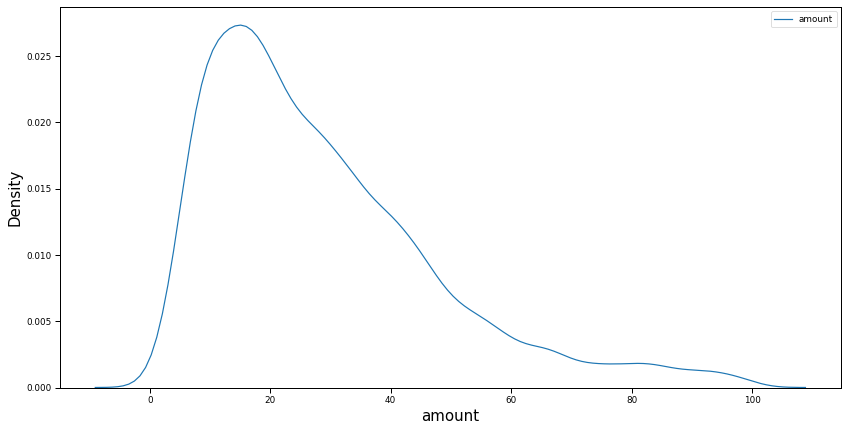

In [162]:
plt.figure(figsize=(14, 7), facecolor='w')
sns.kdeplot(data[data['amount'] < 100]['amount'])
plt.xlabel("amount", fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.show()

## We observe that both the numerical features - balance and amount are both right skewed

## Total transactions made each day

In [163]:
data['date'].value_counts()

2018-09-28    174
2018-08-17    172
2018-10-05    168
2018-10-17    162
2018-09-14    161
             ... 
2018-08-06     99
2018-08-20     97
2018-10-23     96
2018-10-08     95
2018-10-30     89
Name: date, Length: 91, dtype: int64

## Total transactions made by each customer

In [164]:
data['account'].value_counts()

ACC-1598451071    578
ACC-1222300524    303
ACC-182446574     292
ACC-4258502723    260
ACC-1037050564    259
                 ... 
ACC-1998563091     40
ACC-3881031190     37
ACC-721712940      34
ACC-4059612845     31
ACC-1217063613     25
Name: account, Length: 100, dtype: int64

In [165]:
data['month'] = data['date'].dt.month

In [166]:
data[data['month']==8]['account'].nunique()

100

## Average number of transactions made by customers each month

10    40.87
9     40.13
8     39.43
Name: month, dtype: float64


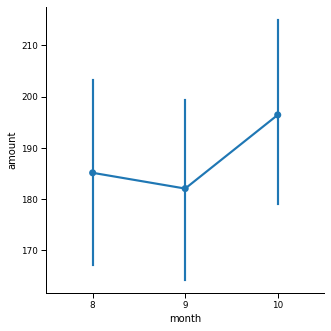

In [170]:
print(data['month'].value_counts() / 100)
sns.catplot(x="month", y="amount", kind="point", data=data);

## Segmenting dataset by date

In [171]:
data_date_count = data.groupby('date').count()
data_date_sum = data.groupby('date').sum()

In [172]:
data_date_count

,status,card_present_flag,account,long_lat,txn_description,first_name,balance,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement,month
date,,,,,,,,,,,,,,,,,,
2018-08-01,137,84,137,137,137,137,137,137,137,84,84,137,137,137,137,84,137,137
2018-08-02,152,99,152,152,152,152,152,152,152,99,99,152,152,152,152,99,152,152
2018-08-03,157,99,157,157,157,157,157,157,157,99,99,157,157,157,157,99,157,157
2018-08-04,118,94,118,118,118,118,118,118,118,94,94,118,118,118,118,94,118,118
2018-08-05,100,73,100,100,100,100,100,100,100,73,73,100,100,100,100,73,100,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-27,139,101,139,139,139,139,139,139,139,101,101,139,139,139,139,101,139,139
2018-10-28,143,101,143,143,143,143,143,143,143,101,101,143,143,143,143,101,143,143
2018-10-29,102,63,102,102,102,102,102,102,102,63,63,102,102,102,102,63,102,102


In [173]:
data_date_sum

,card_present_flag,balance,age,amount,month
date,,,,,
2018-08-01,63.0,1360954.62,4142,29867.94,1096
2018-08-02,85.0,2122469.92,4787,21786.32,1216
2018-08-03,79.0,1599482.51,4985,38096.58,1256
2018-08-04,74.0,968403.51,3662,6296.05,944
2018-08-05,54.0,1329752.54,2991,4426.50,800
...,...,...,...,...,...
2018-10-27,81.0,2366504.71,4336,6971.58,1390
2018-10-28,78.0,2187733.76,4327,8438.11,1430
2018-10-29,47.0,2128124.72,3005,38549.14,1020


## Daily Transaction volume distribution

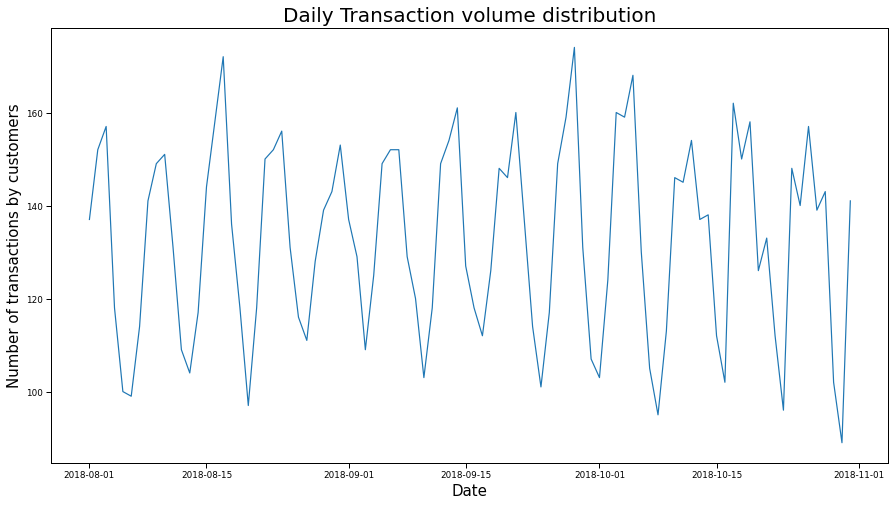

In [174]:
plt.figure(figsize=(15,8))
sns.lineplot(x=data_date_count.index, y=data_date_count['customer_id'])
plt.title("Daily Transaction volume distribution")
plt.xlabel("Date", fontsize=15)
plt.ylabel("Number of transactions by customers", fontsize=15)
plt.show()

## Daily Transaction Amount distribution

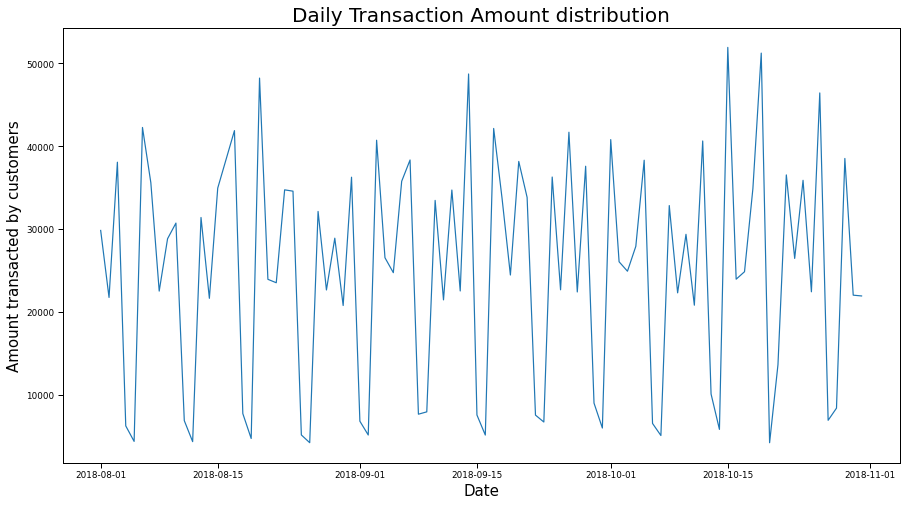

In [175]:
plt.figure(figsize=(15,8))
sns.lineplot(x=data_date_sum.index, y=data_date_sum['amount'])
plt.title("Daily Transaction Amount distribution")
plt.xlabel("Date", fontsize=15)
plt.ylabel("Amount transacted by customers", fontsize=15)
plt.show()

### From the above two line plots, we can infer that the number of transactions as well as the amount transacted  are remarkably low on weekends especially on sunday.

## Geospatial Plotting using the location data

In [176]:
import cartopy.crs as ccrs

import cartopy.feature as cfeature

In [177]:
data['long'] = data['long_lat'].apply(lambda x: x.split(' ')[0]).astype(float)
data['lat'] = data['long_lat'].apply(lambda x: x.split(' ')[1]).astype(float)

In [178]:
data['long'].nunique(), data['lat']

(87,
 0       -27.95
 1       -27.95
 2       -33.94
 3       -27.66
 4       -27.95
          ...  
 12038   -29.47
 12039   -33.87
 12040   -33.89
 12041   -37.76
 12042   -33.77
 Name: lat, Length: 12043, dtype: float64)

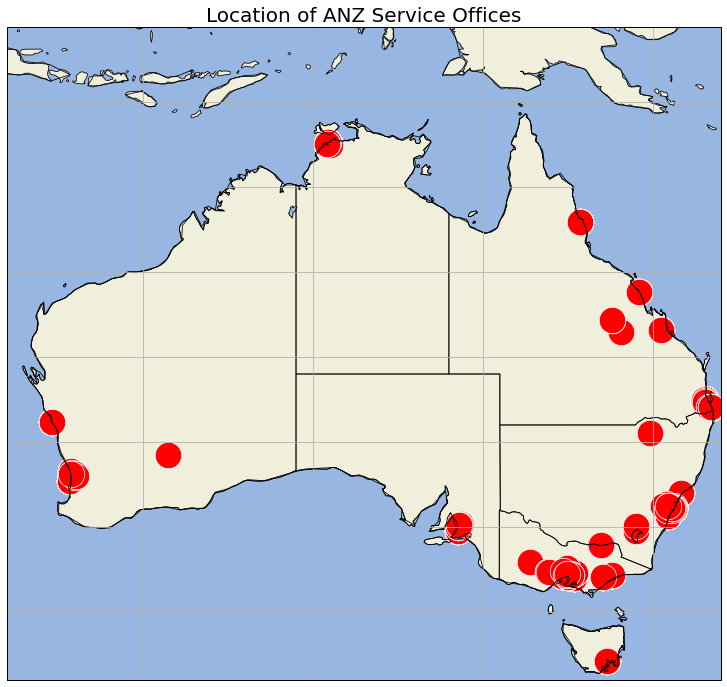

In [180]:
plt.figure(figsize=(15,12))
ax = plt.axes(projection=ccrs.PlateCarree())
plt.title('Location of ANZ Service Offices')
ax.set_extent([112, 154, -44, -5.6], ccrs.PlateCarree())
ax.coastlines(resolution='110m')
ax.gridlines()
ax.add_feature(cfeature.STATES)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
sns.scatterplot(
    x=data['long'],
    y=data['lat'],
    color="red",
    s=700,
    alpha=1,
    transform=ccrs.PlateCarree()
)
# plt.savefig('map.png')
plt.show()

In [181]:
data['merchant_long'] = data['merchant_long_lat'].dropna(axis=0).apply(lambda x: str(x).split(' ')[0]).astype(float)
data['merchant_lat'] = data['merchant_long_lat'].dropna(axis=0).apply(lambda x: str(x).split(' ')[1]).astype(float)

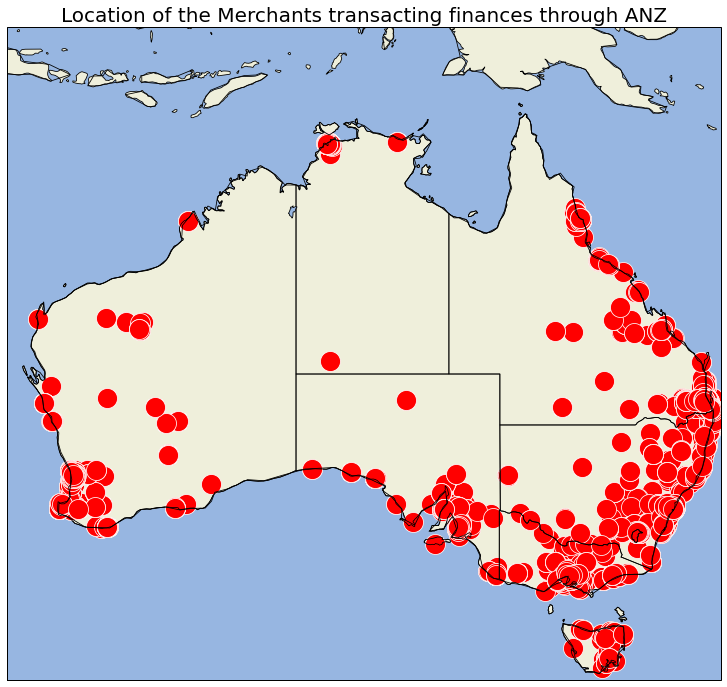

In [182]:
plt.figure(figsize=(15,12))
ax = plt.axes(projection=ccrs.PlateCarree())
plt.title('Location of the Merchants transacting finances through ANZ')
ax.set_extent([112, 154, -44, -5.6], ccrs.PlateCarree())
ax.coastlines(resolution='110m')
ax.add_feature(cfeature.STATES)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
sns.scatterplot(
    x=data['merchant_long'],
    y=data['merchant_lat'],
    color="red",
    s=400,
    alpha=1,
    transform=ccrs.PlateCarree()
)
# plt.savefig('map.png')
plt.show()